William Alan Cahyadi

2602110752

Link Video: https://drive.google.com/file/d/1553MvaqXh6TVDVTCEcY47PcQYRitXIej/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# Load Data

In [ ]:
df = pd.read_csv('data_1C.csv')

df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8237 non-null   int64  
 1   age          8237 non-null   int64  
 2   job          8227 non-null   object 
 3   marital      8237 non-null   object 
 4   education    8237 non-null   object 
 5   default      8237 non-null   object 
 6   housing      8237 non-null   object 
 7   loan         8237 non-null   object 
 8   contact      8237 non-null   object 
 9   month        8237 non-null   object 
 10  day_of_week  8237 non-null   object 
 11  duration     8222 non-null   float64
 12  campaign     8237 non-null   int64  
 13  pdays        8237 non-null   int64  
 14  previous     8237 non-null   int64  
 15  poutcome     8237 non-null   object 
 16  y            8237 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB
None


  data-data masih berupa tipe object, float, dan integer

In [ ]:
print(df.describe(include='all'))

         Unnamed: 0          age     job  marital          education default  \
count   8237.000000  8237.000000    8227     8237               8237    8237   
unique          NaN          NaN      12        4                  8       3   
top             NaN          NaN  admin.  married  university.degree      no   
freq            NaN          NaN    2046     4943               2456    6533   
mean    4118.000000    40.000486     NaN      NaN                NaN     NaN   
std     2377.961417    10.331078     NaN      NaN                NaN     NaN   
min        0.000000    17.000000     NaN      NaN                NaN     NaN   
25%     2059.000000    32.000000     NaN      NaN                NaN     NaN   
50%     4118.000000    38.000000     NaN      NaN                NaN     NaN   
75%     6177.000000    47.000000     NaN      NaN                NaN     NaN   
max     8236.000000    98.000000     NaN      NaN                NaN     NaN   

       housing  loan   contact month da

# Data Preprocessing

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'age', 'contact'])

In [ ]:
missing_values = df.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

for column in df.columns:
    if df[column].dtype == 'object':

        df[column].fillna(df[column].mode()[0], inplace=True)
    else:

        df[column].fillna(df[column].mean(), inplace=True)

missing_values_after = df.isnull().sum()
print()
print("Missing values after imputation:")
print(missing_values_after)

Missing values before imputation:
job            10
marital         0
education       0
default         0
housing         0
loan            0
month           0
day_of_week     0
duration       15
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

Missing values after imputation:
job            0
marital        0
education      0
default        0
housing        0
loan           0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


Terlihat sebelum dan sesudah perubahan pada missing values

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df.head()

,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,9,2,2,0,2,0,7,4,648.0,1,999,0,1,0
1,0,2,6,0,0,0,1,4,295.0,1,999,0,1,0
2,1,2,2,0,2,0,3,1,236.0,2,999,0,1,0
3,7,1,7,0,0,0,6,4,143.0,3,999,0,1,0
4,9,1,6,0,0,0,1,2,155.0,1,999,0,1,0


In [ ]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df.describe()

,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000
mean,3.751366,1.174214,3.749181,0.207236,1.070171,0.302902,4.261867,2.005099,260.189370,2.555299,962.352434,0.172393,0.926915,0.113391
std,3.596461,0.611827,2.141027,0.406248,0.985411,0.699967,2.318029,1.412228,254.710569,2.663180,187.221927,0.481973,0.366454,0.317089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,104.000000,1.000000,999.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,3.000000,0.000000,2.000000,0.000000,4.000000,2.000000,184.000000,2.000000,999.000000,0.000000,1.000000,0.000000
75%,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,6.000000,3.000000,324.000000,3.000000,999.000000,0.000000,1.000000,0.000000
max,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,9.000000,4.000000,3284.000000,43.000000,999.000000,6.000000,2.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   job          8237 non-null   int64  
 1   marital      8237 non-null   int64  
 2   education    8237 non-null   int64  
 3   default      8237 non-null   int64  
 4   housing      8237 non-null   int64  
 5   loan         8237 non-null   int64  
 6   month        8237 non-null   int64  
 7   day_of_week  8237 non-null   int64  
 8   duration     8237 non-null   float64
 9   campaign     8237 non-null   int64  
 10  pdays        8237 non-null   int64  
 11  previous     8237 non-null   int64  
 12  poutcome     8237 non-null   int64  
 13  y            8237 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 901.0 KB


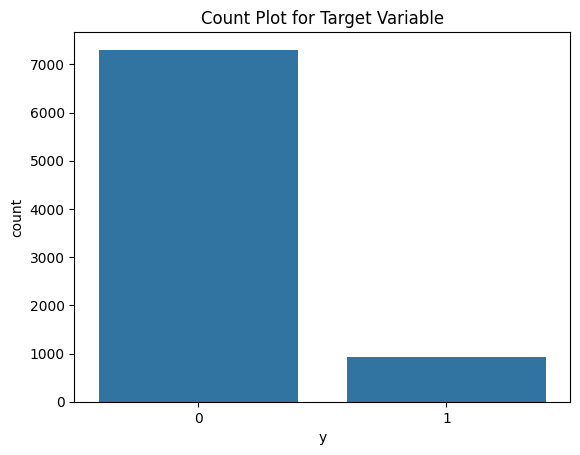

In [ ]:
sns.countplot(x=df['y'])
plt.title('Count Plot for Target Variable')
plt.show()

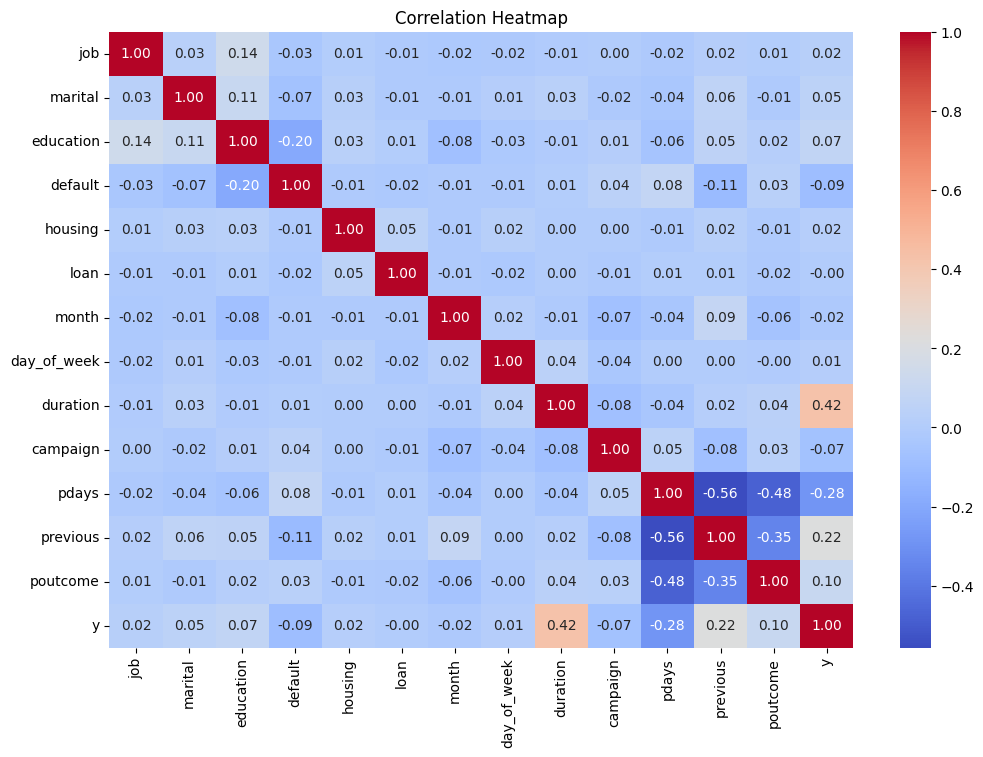

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Train Model

In [ ]:
!pip install lightgbm

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_predictions)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_report = classification_report(y_test, lr_predictions)

Melakukan beberapa training model pada random forest, logistic regression, dan LGBM dengan beberapa parameter

In [ ]:
lgbm = lgb.LGBMClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],

    'num_leaves': [20, 30, 40],
    'min_child_samples': [20, 30, 50]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_lgbm = grid_search.best_estimator_
y_pred = best_lgbm.predict(X_test)
y_pred_proba = best_lgbm.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)

[LightGBM] [Info] Number of positive: 600, number of negative: 4671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 5271, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.113830 -> initscore=-2.052199
[LightGBM] [Info] Start training from score -2.052199
[LightGBM] [Info] Number of positive: 600, number of negative: 4671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 5271, number of used features: 13
[LightGBM] [Info] [binary:Bo

In [ ]:
lreg = LogisticRegression()
rf = RandomForestClassifier()
lgbm = lgb.LGBMClassifier()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [ ]:
models = [lreg, rf, lgbm]
mnames = ['Logistic Regression', 'Random Forest', 'LightGBM']

scores = []
mean_scores = []
std_devs = []

for model, model_name in zip(models, mnames):
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    estimator = Pipeline([
        ('model', model)
    ])

    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    scores.append(model_cv)
    mean_scores.append(model_cv.mean())
    std_devs.append(model_cv.std())

[LightGBM] [Info] Number of positive: 600, number of negative: 4671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 5271, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.113830 -> initscore=-2.052199
[LightGBM] [Info] Start training from score -2.052199
[LightGBM] [Info] Number of positive: 600, number of negative: 4671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 5271, number of used features: 13
[LightGBM] [Info] [binary:Bo

# Evaluation

In [ ]:
print("Random Forest Classification Report:\n", rf_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1464
           1       0.61      0.39      0.47       184

    accuracy                           0.90      1648
   macro avg       0.77      0.68      0.71      1648
weighted avg       0.89      0.90      0.89      1648



In [ ]:
print("Logistic Regression Classification Report:\n", lr_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1464
           1       0.65      0.37      0.47       184

    accuracy                           0.91      1648
   macro avg       0.79      0.67      0.71      1648
weighted avg       0.89      0.91      0.90      1648



In [ ]:
print("Best LightGBM Model:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc)
print("Best Parameters:", grid_search.best_params_)

Best LightGBM Model:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1464
           1       0.57      0.43      0.49       184

    accuracy                           0.90      1648
   macro avg       0.75      0.69      0.72      1648
weighted avg       0.89      0.90      0.89      1648

ROC AUC Score: 0.8983502613447375
Best Parameters: {'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 20}


In [ ]:
hasil = pd.DataFrame({
    'model': mnames,
    'mean roc_auc': mean_scores,
    'std dev': std_devs
}).sort_values(by='mean roc_auc', ascending=False)

print(hasil)

                 model  mean roc_auc   std dev
2             LightGBM      0.905977  0.010149
1        Random Forest      0.894585  0.010483
0  Logistic Regression      0.874303  0.005765


Seluruh model memiliki hasil metrics yang baik, namun rata-rata roc auc tertinggi tetap dimiliki LightBGM

Yang paling tinggi disini adalah Light BGM

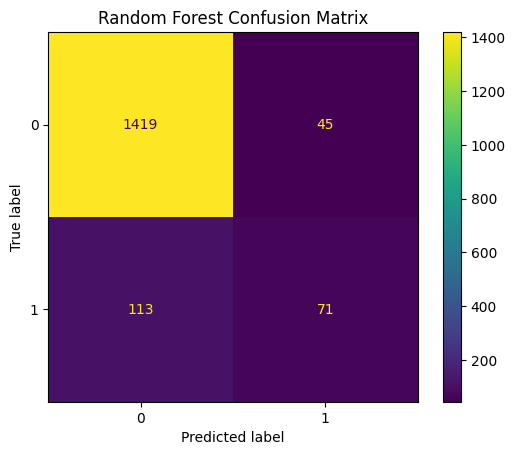

In [ ]:
rf_cm = confusion_matrix(y_test, rf_predictions, labels=rf_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_).plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

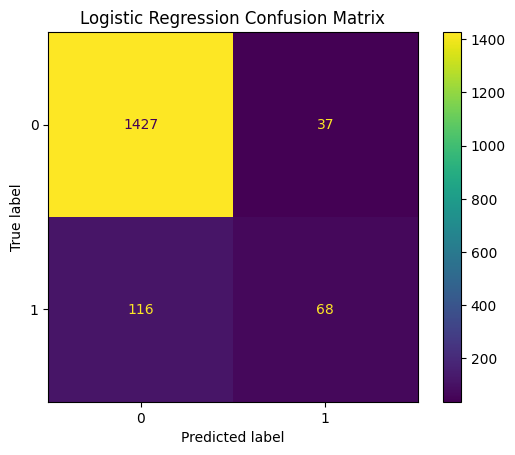

In [ ]:
lr_cm = confusion_matrix(y_test, lr_predictions, labels=lr_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr_model.classes_).plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

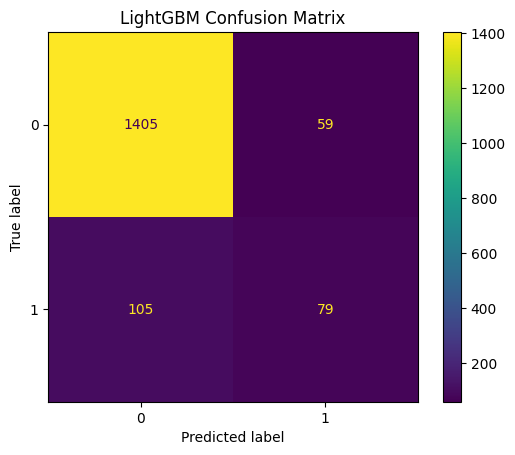

In [ ]:
lgbm_cm = confusion_matrix(y_test, y_pred, labels=best_lgbm.classes_)
ConfusionMatrixDisplay(confusion_matrix=lgbm_cm, display_labels=best_lgbm.classes_).plot()
plt.title('LightGBM Confusion Matrix')
plt.show()

In [ ]:
best_model = best_lgbm
with open('model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

Essay dikerjakan di dalam pdf